# آنچه در این فایل یاد میگیرید

1.  CSV /نحوه وارد کردن یک دیتاست فایل اکسل

2.    keras <- نحوه توصیف و گردآوردی یک مدل پرسپترون چند لایه 

3. نحوه ارزیابی یک مدل کراس برای یک دیتاست ارزیابی (ولیدیشن دیتاست)

## مراحل فایل

1) بارگذاری دیتا

In [2]:
# وارد کردن کتابخانه
import pandas as pd
import numpy as np

# وارد کردن دیتاست دیابت
dataset = pd.read_excel("C:\\Users\\ShahinN\\Desktop\\pima-indians-diabetes.xlsx", header=None)
dataset.head()                        

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# بخش بندی دیتاست
X = dataset.values[:,0:8]
Y = dataset.values[:,8]

In [4]:
# وارد کردن پکیج ها و ابزارهای یادگیری عمیق
# conda install -c conda-forge keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
# ساخت مدل
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
    

 تصویر زیر، ساختار شبکه  را نشان میدهد

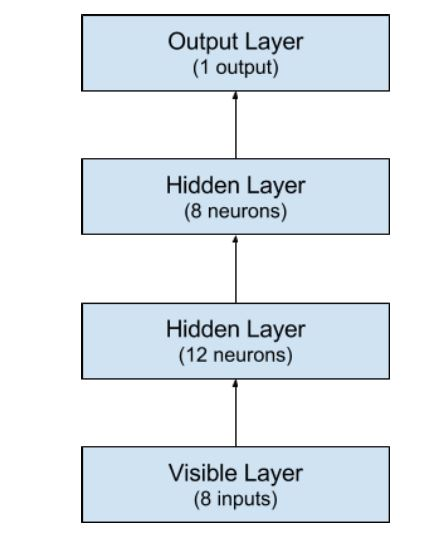

In [10]:
from IPython.display import Image
Image("C:\\Users\\ShahinN\\Desktop\\network structure.JPG")

In [6]:
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
#Fit Model
model.fit(X, Y, epochs=150, batch_size=10)


Epoch 1/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6828 - accuracy: 0.6276
Epoch 2/150
768/768 [==============================] - 0s 272us/step - loss: 0.6611 - accuracy: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 259us/step - loss: 0.6464 - accuracy: 0.6536
Epoch 4/150
768/768 [==============================] - 0s 277us/step - loss: 0.6352 - accuracy: 0.6562
Epoch 5/150
768/768 [==============================] - 0s 275us/step - loss: 0.6175 - accuracy: 0.6576
Epoch 6/150
768/768 [==============================] - 0s 264us/step - loss: 0.6126 - accuracy: 0.6706
Epoch 7/150
768/768 [==============================] - 0s 255us/step - loss: 0.6002 - accuracy: 0.6823
Epoch 8/150
768/768 [==============================] - 0s 218us/step - loss: 0.5945 - accuracy: 0.6927
Epoch 9/150
768/768 [==============================] - 0s 270us/step - loss: 0.5874 - accuracy: 0.6979
Epoch 10/150
768/768 [==============================] - 0s 260us/step - lo

In [8]:
# ارزیابی مدل
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 236us/step
accuracy: 78.91%


# ذخیره کردن مدل شبکه عصبی با فرمت Json

In [9]:

model_json = model.to_json()

with open("C:\\Users\\ShahinN\\Desktop\\model.json", "w") as json_file:
    json_file.write(model_json)

# ذخیره سازی وزن های مدل
model.save_weights("C:\\Users\\ShahinN\\Desktop\\model.h5")

print("Saved model to disk")

Saved model to disk


In [12]:
from keras.models import model_from_json

# بارگذاری فایل json و ساخت مدل
json_file = open("C:\\Users\\ShahinN\\Desktop\\model.json" , 'r' )
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# بازگذاری وزن ها در مدل جدید
loaded_model.load_weights("C:\\Users\\ShahinN\\Desktop\\model.h5")
print("Loaded model from disk")

Loaded model from disk


In [14]:
# ارزیابی دقت پیش بینی مدل
loaded_model.compile(loss= 'binary_crossentropy' , optimizer= 'rmsprop' , metrics=[ 'accuracy' ])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 78.91%


# حفظ بهترین مدل ها هنگام آموزش با استفاده از check point 

In [28]:
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy' , verbose=1, save_best_only=True,
mode= 'max' )
callbacks_list = [checkpoint]

In [29]:
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10,
callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.80709, saving model to weights-improvement-01-0.81.hdf5

Epoch 00002: val_accuracy improved from 0.80709 to 0.81102, saving model to weights-improvement-02-0.81.hdf5

Epoch 00003: val_accuracy did not improve from 0.81102

Epoch 00004: val_accuracy did not improve from 0.81102

Epoch 00005: val_accuracy improved from 0.81102 to 0.81496, saving model to weights-improvement-05-0.81.hdf5

Epoch 00006: val_accuracy did not improve from 0.81496

Epoch 00007: val_accuracy did not improve from 0.81496

Epoch 00008: val_accuracy did not improve from 0.81496

Epoch 00009: val_accuracy did not improve from 0.81496

Epoch 00010: val_accuracy did not improve from 0.81496

Epoch 00011: val_accuracy did not improve from 0.81496

Epoch 00012: val_accuracy did not improve from 0.81496

Epoch 00013: val_accuracy did not improve from 0.81496

Epoch 00014: val_accuracy did not improve from 0.81496

Epoch 00015: val_accuracy did not improve from 0.81496



In [30]:
# ارزیابی مدل
scores = model.evaluate(X, Y)

768/768 [==============================] - 0s 102us/step


In [31]:
print(scores[1]*100)

81.77083134651184


# Checkpoint بهترین مدل فقط

In [32]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy' , verbose=1, save_best_only=True,
            mode= 'max' )
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10,
            callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.79134, saving model to weights.best.hdf5

Epoch 00002: val_accuracy improved from 0.79134 to 0.79921, saving model to weights.best.hdf5

Epoch 00003: val_accuracy improved from 0.79921 to 0.80315, saving model to weights.best.hdf5

Epoch 00004: val_accuracy did not improve from 0.80315

Epoch 00005: val_accuracy improved from 0.80315 to 0.80709, saving model to weights.best.hdf5

Epoch 00006: val_accuracy improved from 0.80709 to 0.81496, saving model to weights.best.hdf5

Epoch 00007: val_accuracy did not improve from 0.81496

Epoch 00008: val_accuracy did not improve from 0.81496

Epoch 00009: val_accuracy did not improve from 0.81496

Epoch 00010: val_accuracy did not improve from 0.81496

Epoch 00011: val_accuracy did not improve from 0.81496

Epoch 00012: val_accuracy did not improve from 0.81496

Epoch 00013: val_accuracy did not improve from 0.81496

Epoch 00014: val_accuracy did not improve from 0.81496

Epoch 00015: val_accura

In [33]:
# ارزیابی مدل
scores = model.evaluate(X, Y)
print(scores[1]*100)

768/768 [==============================] - 0s 122us/step
81.11979365348816
